In [2]:
import sys
sys.path.append('../../30_data_tools/')

In [31]:
import pandas as pd
import plotly.express as px
from helper import load_dotenv
import cv2
from tqdm import tqdm

In [6]:
dotenv = load_dotenv()

In [8]:
pkl_path = dotenv['MODEL_DIR'].parent / 'tile_quality' / '2024-02-18_01.pkl'

In [9]:
data = pd.read_pickle( pkl_path )

In [26]:
import image_similarity_measures
from image_similarity_measures.quality_metrics import rmse, psnr, fsim, issm, uiq, sam, sre 

In [27]:
similiarity_functions = {
    "rmse" : rmse,
    "psnr" : psnr,
    "fsim" : fsim,
    "issm" : issm,
    "uiq" : uiq,
    "sam" : sam,
    "sre" : sre 
}

In [58]:
sample = data.loc[
    pd.isna(data.issm)
].sample(n=25)

In [81]:
for i in tqdm(range(sample.shape[0])):
    row = sample.iloc[i]
    moire_img = cv2.imread( str(row.moire_path) )
    no_moire_img = cv2.imread( str(row.no_moire_path) )
    
    for key in similiarity_functions:
        data.loc[
            row.name,
            key
        ] = similiarity_functions[key](moire_img, no_moire_img)

  0%|                                                    | 0/25 [00:00<?, ?it/s]/Users/frederic.birwe/Library/Python/3.10/lib/python/site-packages/image_similarity_measures/quality_metrics.py:171: RuntimeWarning:

divide by zero encountered in log2

/Users/frederic.birwe/Library/Python/3.10/lib/python/site-packages/image_similarity_measures/quality_metrics.py:171: RuntimeWarning:

invalid value encountered in multiply

/Users/frederic.birwe/Library/Python/3.10/lib/python/site-packages/image_similarity_measures/quality_metrics.py:188: RuntimeWarning:

invalid value encountered in scalar divide

/Users/frederic.birwe/Library/Python/3.10/lib/python/site-packages/image_similarity_measures/quality_metrics.py:276: RuntimeWarning:

invalid value encountered in divide

/Users/frederic.birwe/Library/Python/3.10/lib/python/site-packages/image_similarity_measures/quality_metrics.py:297: RuntimeWarning:

invalid value encountered in divide

100%|███████████████████████████████████████████| 25/25 [

In [60]:
relevant_data = data.loc[
    pd.isna(data.issm) == False
]

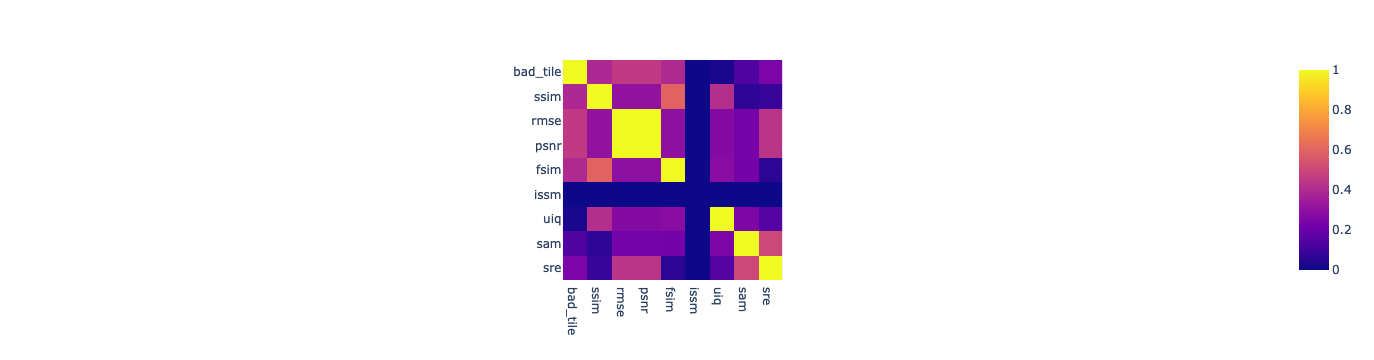

In [62]:
px.imshow(
    relevant_data.loc[
        :,
        ['bad_tile','ssim'] + list(similiarity_functions.keys())
    ].corr(method="spearman").abs().fillna(0)
)

In [71]:
from sklearn import svm

array([1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2,
       2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1])

In [78]:
X = relevant_data.loc[
    :,
    ['ssim'] + list(similiarity_functions.keys())
].values
y = relevant_data.loc[
    :,
    'bad_tile'
].values
clf = svm.SVC()
clf.fit(X, y)

SVC()

In [80]:
clf.score(X,y)

0.782051282051282

In [63]:
i = 0

sre


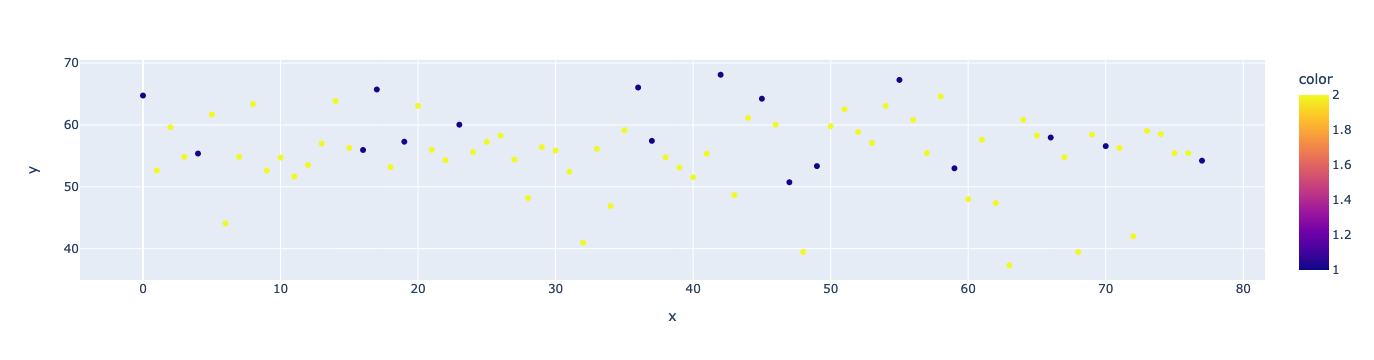

In [70]:
key = list(similiarity_functions.keys())[i]
print( key )
i+=1

px.scatter(
    y=relevant_data[key],
    color=relevant_data.bad_tile
)

In [ ]:
0 / 0

In [83]:
data.to_pickle( pkl_path )